# Local Search Implementation on Diagonal Magic Cube
## by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from Steepest import *
from hill_climb import *

from Sideway import *
from random_restart import *
from Simulated import *
from genetic import *
from geneticAlgoJere import *

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [ ]:
goal_state = [

# Level 1
[
    [67,18,119,106,5],
    [116,17,14,73,95],
    [40,50,81,65,79],
    [56,120,55,49,35],
    [36,110,46,22,101]
],
# Level 2
[
    [66,72,27,102,48],
    [26,39,92,44,114],
    [32,93,88,83,19],
    [113,57,9,62,74],
    [78,54,99,24,60]
],
# Level 3
[
    [42,111,85,2,75],
    [30,118,21,123,23],
    [89,68,63,58,37],
    [103,3,105,8,96],
    [51,15,41,124,84]
],
# Level 4
[
    [115,98,4,1,97],
    [52,64,117,69,13],
    [107,43,38,33,94],
    [12,82,34,87,100],
    [29,28,122,125,11]
],
# Level 5
[
    [25,16,80,104,90],
    [91,77,71,6,70],
    [47,61,45,76,86],
    [31,53,112,109,10],
    [121,108,7,20,59]
]
]

In [ ]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [ ]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

In [ ]:
goal_cube.print_tensor()

In [ ]:
goal_cube.plot_cube()

### Problem Cube Initialization

In [2]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

## Local Seach Implementation

### Steepest Descent Hill-Climbing

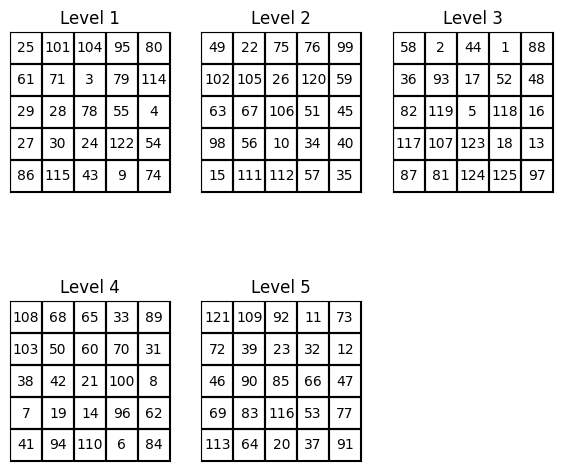

In [3]:
hc_cube = copy.deepcopy(cube)
hc_cube.plot_cube()

In [4]:
steepest = Steepest(hc_cube)

initial value: 5676.0

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
step 1 ; best successor value: 5440.0 ; current value: 5676.0
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
step 2 ; best successor value: 5133.0 ; current value: 5440.0
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
step 3 ; best successor value: 4867.0 ; current value: 5133.0
- -- -- -- -- -- -- -- -- -- -- -- -

In [5]:
steepest.results()

+------------------------ RESULTS -------------------------+

    iterations: 12

    initial Value: 5676.000000

    final Value: 3610.000000

+-------------------------- END ---------------------------+


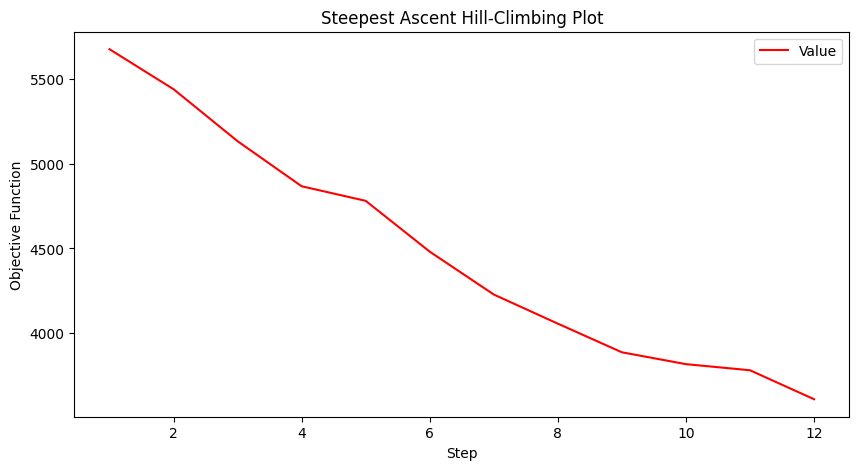

In [6]:
steepest.hist_plot()

### Hill-Climbing with Sideway Move

In [7]:
SM_cube = copy.deepcopy(cube)

In [8]:
sideway = Sideway(SM_cube)

initial value: 5676.0

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
step 1 ; best successor value: 5303.0 ; current value: 5676.0
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
step 2 ; best successor value: 5047.0 ; current value: 5303.0
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
step 3 ; best successor value: 4861.0 ; current value: 5047.0
- -- -- -- -- -- -- -- -- -- -- -- -

In [9]:
sideway.results()

+------------------------ RESULTS -------------------------+

    iterations: 14

    initial Value: 5676.000000
    final Value: 3415.000000

    Sideway counter: 0

+-------------------------- END ---------------------------+


### Random Restart Hill-Climbing


In [ ]:
RR_cube = copy.deepcopy(cube)

In [ ]:
RR_cube.plot_cube()

In [ ]:
RR = Random_restart(cube=RR_cube,max_restart=100)

In [ ]:
RR.results()

In [ ]:
# print(f"Random Restart Best Value: {RR.best_value}\n")
# print(f"Ideal Value: {obj_func_goal}\n")
# print(f"differences from ideal: {RR.best_value - obj_func_goal}")

In [ ]:
RR.hist_plot()

In [ ]:
RR.final_state().plot_cube()

### Simulated Annealing

#### Initial State

In [13]:
SA_cube = copy.deepcopy(cube)

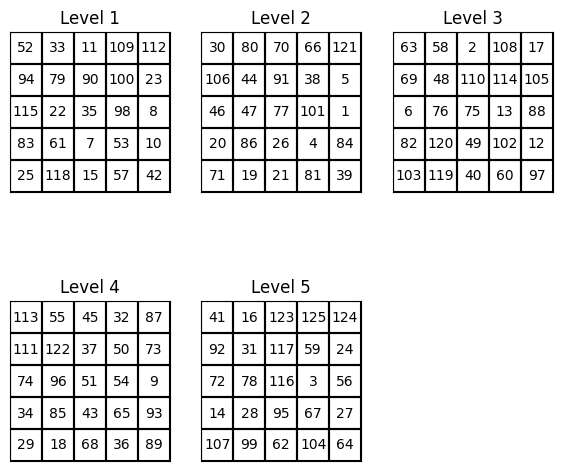

In [14]:
SA_cube.plot_cube()

In [15]:
print(f"intial objective function: {SA_cube.objective_function(square_error=False)}")

intial objective function: 5863.0


#### Searching

In [16]:
SA = Simulated(cube=SA_cube,tmax=500000,tmin=0,step_max=200,cooling_schedule="quadratic",alpha=0.99,greedy_move=False,function_error='absolute')

Initial Energy: 5863.0

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Step:1,Neighbor's Energy: 5952.0, Best Energy: 5863.0, de: 89.0, Temperature: 500000, Probability: 0.9998220158410601

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Step:2,Neighbor's Energy: 6027.0, Best Energy: 5863.0, de: 75.0, Temperature: 251256.2814070352, Probability: 0.9997015445466925

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

#### Result

In [17]:
SA.results()

+------------------------ RESULTS -------------------------+

    cooling sched.: quadratic multiplicative
    initial temp: 500000
    final temp: 12.753153280914473
    final step: 200

    initial energy: 5863.000

    final energy: 4414.000
    energy differences: 1449.000

    frequency stuck: 62
    ratio stuck: 0.31

    runtime: 0.183 seconds

+-------------------------- END ---------------------------+


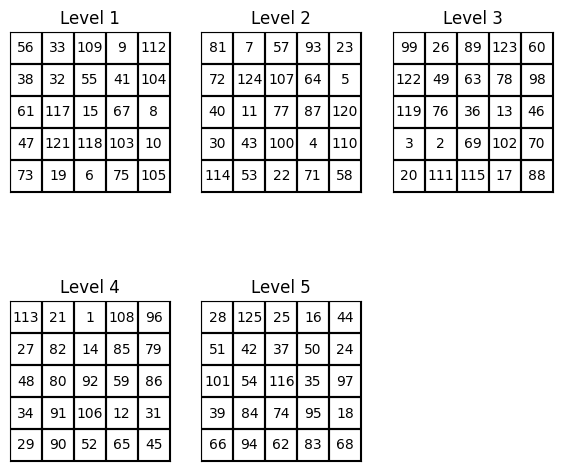

In [18]:
SA.final_state().plot_cube()

#### Plot

Best Energy 

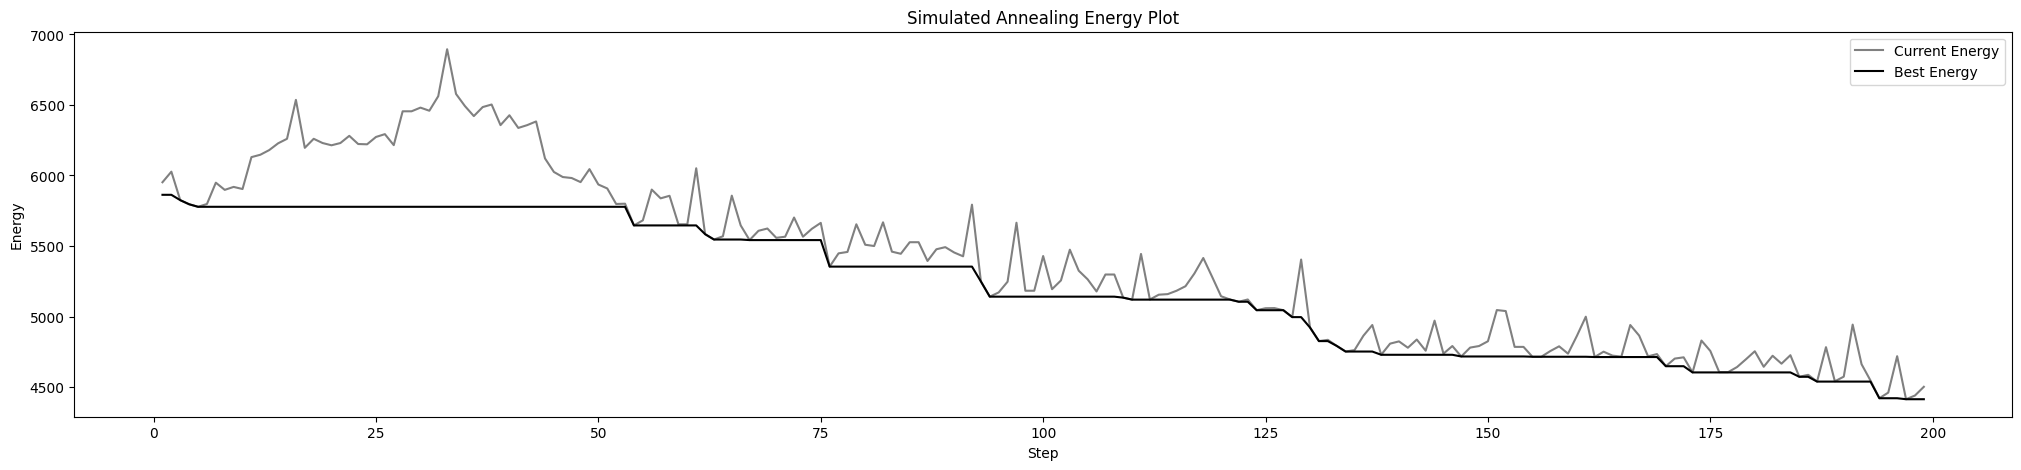

In [19]:
SA.hist_plot(Best_energy=True,Curr_energy=True,freq_stuck=False,title="Simulated Annealing Energy Plot")

Probability

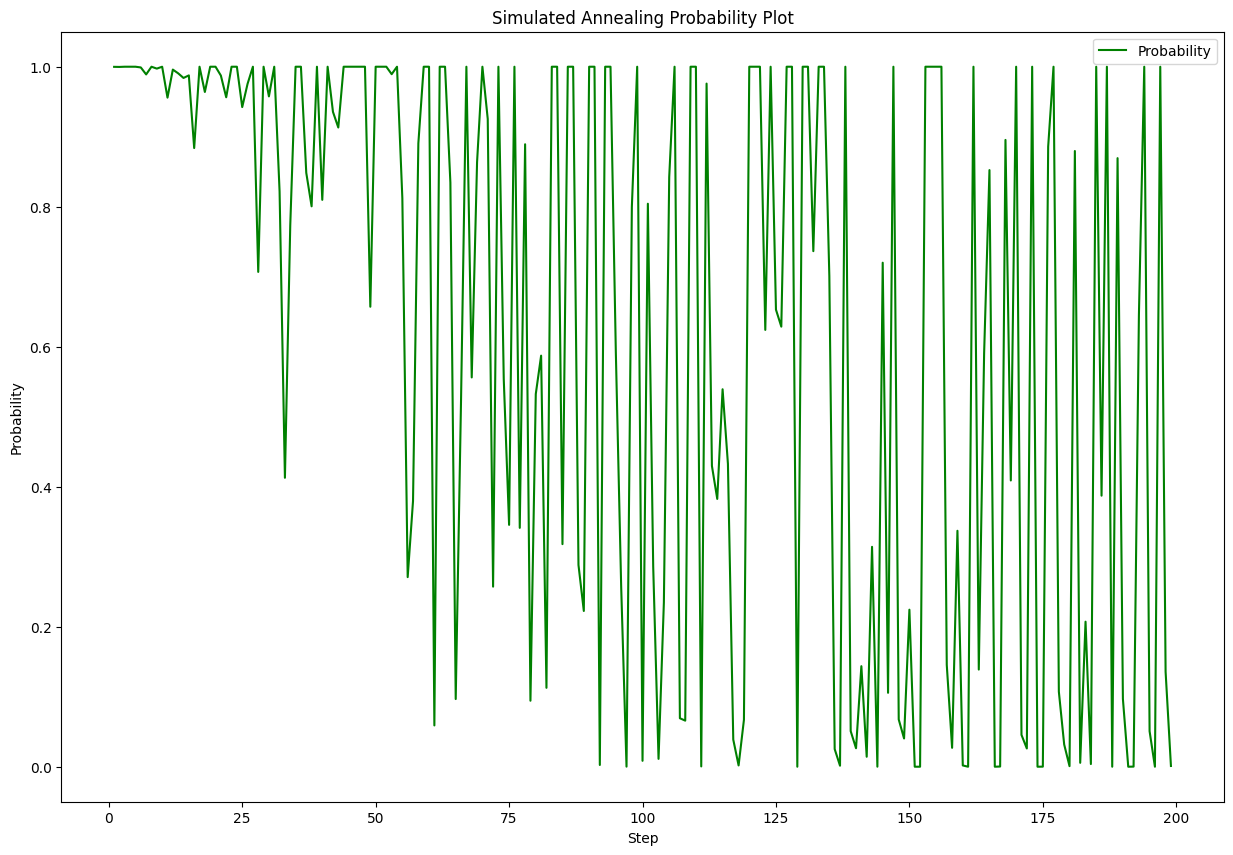

In [20]:
SA.prob_plot(title="Simulated Annealing Probability Plot")

### Genetic Algorithm


In [ ]:
print(f"goal cube objective function value: {obj_func_goal}")

In [ ]:
GAcube = copy.deepcopy(cube)
GAcube.plot_cube()

In [ ]:
genetic_algo = GeneticAlgoNJ(
    cube=GAcube,
    population_size=500,
    generation_rate=300,
    mutation_rate=0.1,
    elitism_size=10
)

In [ ]:
genetic_algo.evolve()

In [ ]:
best_cube, best_fitness = genetic_algo.get_best_solution()

# Plot the fitness evolution over generations
genetic_algo.hist_plot()

print("\nBest Fitness:", best_fitness)

In [ ]:
GA=GeneticAlgo(cube=copy.deepcopy(cube), goal_cube=goal_cube, population_size=500, generation_rate=300)

In [ ]:
GA.hist_plot()